**Objective**

Your job is to build a model that will predict the price of a house based on features provided in the dataset. Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import h3

# Exploring Data

In [2]:
data = pd.read_excel("C:/Users/jw156/Ironhack/Day20/data_mid_bootcamp_project_regression/regression_data.xls")

In [3]:
data.shape

(21597, 21)

In [4]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [5]:
data = data.set_index('id')

In [6]:
data.count()

date             21597
bedrooms         21597
bathrooms        21597
sqft_living      21597
sqft_lot         21597
floors           21597
waterfront       21597
view             21597
condition        21597
grade            21597
sqft_above       21597
sqft_basement    21597
yr_built         21597
yr_renovated     21597
zipcode          21597
lat              21597
long             21597
sqft_living15    21597
sqft_lot15       21597
price            21597
dtype: int64

In [7]:
data.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat  

In [9]:
data.nunique()

date              372
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
price            3622
dtype: int64

# Adding New Featues

In [10]:
def get_months(x):
    x = x.strftime("%m")
    return int(x)

def get_years(x):
    x = x.strftime("%Y")
    return int(x)

def get_weekday(x):
    x = x.strftime("%w")
    return int(x)

def get_weekyear(x):
    x = x.strftime("%W")
    return int(x)

In [11]:
data['month_sold'] = list(map(get_months, data['date']))
data['year_sold'] = list(map(get_years, data['date']))


In [12]:
data['week_year_sold'] = data['date'].apply(get_weekyear)

In [13]:
data['week_day'] = data['date'].apply(get_weekday)

In [14]:
data['bathrooms'] = list(map(round, data['bathrooms']))

In [15]:
def season_sold(x):
    if x == 3 or x == 4 or x == 5:
        return 'Spring'
    elif x == 6 or x == 7 or x == 8:
        return 'Summer'
    elif x == 9 or x == 10 or x == 11:
        return 'Autumn'
    elif x == 12 or x == 1 or x== 2:
        return 'Winter'

In [16]:
data['season'] = data.month_sold.apply(season_sold)

In [17]:
seasonal_data = data.copy()

In [18]:
data = pd.get_dummies(data,columns=["season"])

In [19]:
def house_age(x):
    return int(2020 - int(x))

In [20]:
data['house_age'] = data.yr_built.apply(house_age)

In [21]:
def get_center_facility(x):
    x = str(x)
    return x[1:3]

In [22]:
def hex_3_point(lat, long):
    return h3.geo_to_h3(lat=lat, lng = long, resolution=5)

In [23]:
data['hex_3'] = data.apply(lambda x: hex_3_point(x['lat'], x['long']), axis=1)


In [24]:
def sqft_overall(sqft, price):
    return sqft / price

In [25]:
data['sqft_living_price'] = data.apply(lambda x: sqft_overall(x['sqft_living'], x['price']), axis=1)

In [26]:
data['sqft_lot_price'] = data.apply(lambda x: sqft_overall(x['sqft_lot'], x['price']), axis=1)

In [27]:
data['sqft_living15_price'] = data.apply(lambda x: sqft_overall(x['sqft_living15'], x['price']), axis=1)

In [28]:
data['sqft_lot15_price'] = data.apply(lambda x: sqft_overall(x['sqft_lot15'], x['price']), axis=1)

In [29]:
data[['mean_sqft_living_price', 'mean_sqft_lot_price', 'mean_sqft_living15_price', 'mean_sqft_lot15_price']] = data[['sqft_living_price', 'sqft_lot_price', 'sqft_living15_price', 'sqft_lot15_price']].groupby(data['hex_3']).transform('mean')

In [71]:
pd.Series(data.sqft_living_price.values,index=data.hex_3).to_dict()
 

AttributeError: 'function' object has no attribute 'values'

In [30]:
data.nunique()

date                          372
bedrooms                       12
bathrooms                       9
sqft_living                  1034
sqft_lot                     9776
floors                          6
waterfront                      2
view                            5
condition                       5
grade                          11
sqft_above                    942
sqft_basement                 306
yr_built                      116
yr_renovated                   70
zipcode                        70
lat                          5033
long                          751
sqft_living15                 777
sqft_lot15                   8682
price                        3622
month_sold                     12
year_sold                       2
week_year_sold                 53
week_day                        7
season_Autumn                   2
season_Spring                   2
season_Summer                   2
season_Winter                   2
house_age                     116
hex_3         

## Checking for Multi-Collinearity

In [31]:
data = data.reset_index(drop=True)
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold,week_year_sold,week_day,season_Autumn,season_Spring,season_Summer,season_Winter,house_age,sqft_living_price,sqft_lot_price,sqft_living15_price,sqft_lot15_price,mean_sqft_living_price,mean_sqft_lot_price,mean_sqft_living15_price,mean_sqft_lot15_price
bedrooms,1.000000,0.487955,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787,-0.001046,-0.009949,-0.001998,0.011769,-0.009550,-0.004957,0.012673,0.001464,-0.155670,0.200915,-0.035772,-0.100673,-0.055185,0.032919,0.001787,0.034627,0.000491
bathrooms,0.487955,1.000000,0.702719,0.090532,0.368151,0.065424,0.203300,-0.068032,0.591830,0.600458,0.334643,0.378287,0.069153,-0.144937,0.048889,0.150939,0.498534,0.087931,0.519628,0.009497,-0.024406,0.008768,0.008273,0.002286,-0.017599,0.018438,-0.003402,-0.378287,0.030156,-0.036287,-0.238589,-0.063914,-0.072186,-0.009358,-0.073013,-0.012445
sqft_living,0.578212,0.702719,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917,0.012112,-0.029014,0.011177,0.006831,-0.004160,-0.014112,0.025039,-0.008382,-0.318152,0.096486,0.004697,-0.253927,-0.020318,-0.052271,0.026314,-0.052423,0.023858
sqft_lot,0.032471,0.090532,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876,-0.002591,0.005628,-0.002514,0.000992,0.003269,0.007103,-0.013420,0.003885,-0.052946,0.016536,0.846752,-0.011194,0.546809,0.098368,0.335964,0.095063,0.331503
floors,0.177944,0.368151,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804,0.014245,-0.022352,0.013512,0.001489,0.004427,-0.013648,0.021086,-0.013826,-0.489193,-0.030988,-0.082495,-0.160110,-0.106319,-0.107750,-0.031059,-0.110524,-0.035080
waterfront,-0.006834,0.065424,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398,0.008148,-0.004168,0.009217,-0.008066,0.009906,-0.004888,-0.002068,-0.002681,0.026153,-0.107517,-0.006378,-0.107365,-0.003952,-0.000195,0.012277,-0.001043,0.021102
view,0.080008,0.203300,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370,-0.005398,0.001268,-0.004444,0.001365,0.003912,0.001564,-0.004726,-0.000595,0.053636,-0.166554,0.017750,-0.184430,0.002180,-0.074585,-0.017495,-0.076304,-0.017895
condition,0.026496,-0.068032,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056,0.022388,-0.045898,0.021694,0.009528,0.005702,-0.029343,0.037943,-0.016501,0.361592,-0.098428,-0.009035,-0.121747,0.006988,-0.010492,-0.021369,-0.010620,-0.023656
grade,0.356563,0.591830,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951,0.008989,-0.030635,0.007563,-0.000763,-0.010385,-0.009053,0.030933,-0.014672,-0.447865,-0.146811,-0.054360,-0.311895,-0.083695,-0.145728,-0.053999,-0.147232,-0.059681
sqft_above,0.479386,0.600458,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.605368,0.010153,-0.023782,0.009678,0.007764,-0.002605,-0.016200,0.025239,-0.007827,-0.424037,0.085193,0.024920,-0.170636,0.004139,0.015644,0.091709,0.014758,0.088601


In [32]:
# locations_by_hex = data[['hex_3', 'lat', 'long', 'zipcode']]

In [33]:
# locations_by_hex.set_index('hex_3').T.to_dict('list')

In [34]:
len(data['hex_3'].unique())

26

In [35]:
len(data['lat'].unique())

5033

In [36]:
data.dtypes

date                        datetime64[ns]
bedrooms                             int64
bathrooms                            int64
sqft_living                          int64
sqft_lot                             int64
floors                             float64
waterfront                           int64
view                                 int64
condition                            int64
grade                                int64
sqft_above                           int64
sqft_basement                        int64
yr_built                             int64
yr_renovated                         int64
zipcode                              int64
lat                                float64
long                               float64
sqft_living15                        int64
sqft_lot15                           int64
price                                int64
month_sold                           int64
year_sold                            int64
week_year_sold                       int64
week_day   

# Graphs

In [37]:
# data.groupby('hex_3').agg({'sqft_lot_price':['min', 'mean','max']})

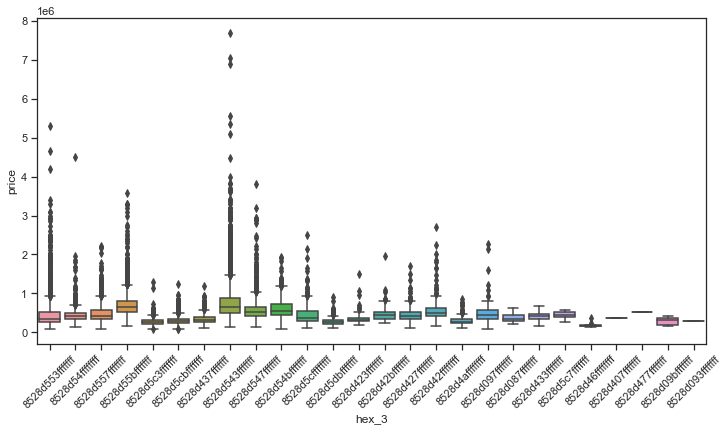

In [38]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'hex_3', y = 'price',  data = data)
xt = plt.xticks(rotation=45)

C:\Users\jw156\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

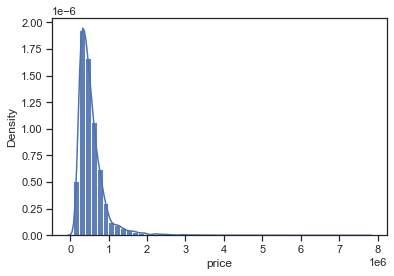

In [39]:
sns.distplot(data['price'], hist_kws={'alpha': 0.9})

<Figure size 432x288 with 0 Axes>

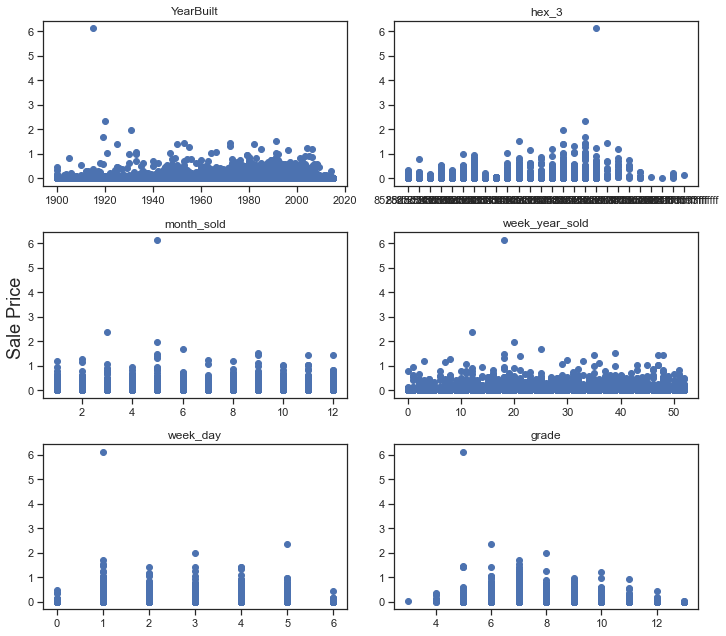

In [40]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = data.sqft_lot_price.values
axarr[0, 0].scatter(data['yr_built'].values, price)
axarr[0, 0].set_title('YearBuilt')
axarr[0, 1].scatter(data['hex_3'].values, price)
axarr[0, 1].set_title('hex_3')
axarr[1, 0].scatter(data['month_sold'].values, price)
axarr[1, 0].set_title('month_sold')
axarr[1, 1].scatter(data['week_year_sold'].values, price)
axarr[1, 1].set_title('week_year_sold')
axarr[2, 0].scatter(data.week_day.values, price)
axarr[2, 0].set_title('week_day')
axarr[2, 1].scatter(data.grade.values, price)
axarr[2, 1].set_title('grade')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='hex_3', ylabel='mean_sqft_lot_price'>

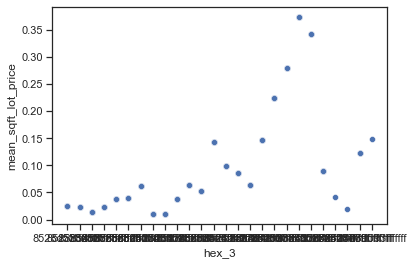

In [41]:
sns.scatterplot(x='hex_3', y= 'mean_sqft_lot_price', data=data)

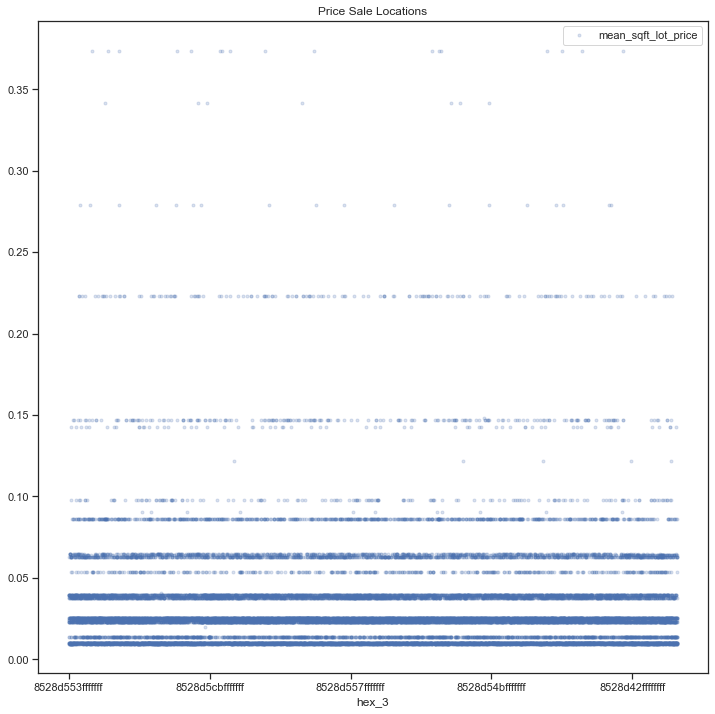

In [42]:
data.plot(x='hex_3',y='mean_sqft_lot_price',style='.',alpha=0.2,figsize=(12,12));
plt.title('Price Sale Locations');

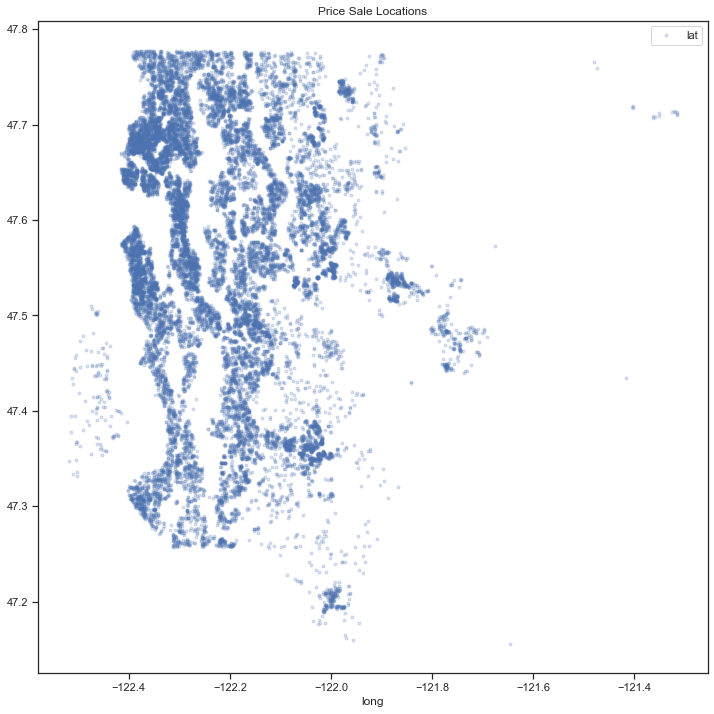

In [151]:
data.plot(x='long',y='lat',style='.',alpha=0.2,figsize=(12,12));
plt.title('Price Sale Locations');

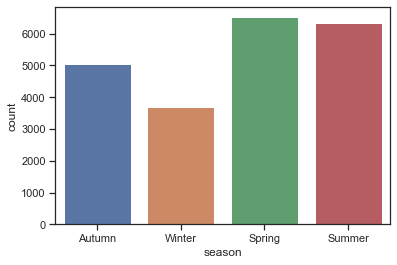

In [43]:
ax = sns.countplot(x="season", data=seasonal_data)

In [69]:
# data['center_facility'] = data['zipcode'].apply(get_center_facility)

In [70]:
# zip_codes_grouping = data.groupby('center_facility').agg({'price':['mean', 'min', 'max']})

In [44]:
data = data.drop(['date'], axis=1)

It appears that sqft_living, grade, sqft_above are correlated to the price. Additinally, some other points that are highly correlated:
- sqft_above & sqft_living 
- sqft_living & bathrooms
- grade & sqft_living
- grade & sqft_above
- grade & sqft_living15
- sqft_above & living16

# Check Multicollinearity 

In [45]:
def columns_vif(df, target, drop=[]):
    
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    
    temporary_vif_frame = df.drop(drop, axis=1)
    
    dropped_vif_frame = temporary_vif_frame.drop(target, axis=1)
    cols = dropped_vif_frame.columns
    temporary_cleaned_data = pd.DataFrame.to_numpy(dropped_vif_frame)

    vif = [variance_inflation_factor(temporary_cleaned_data, i) for i in range(temporary_cleaned_data.shape[1])]

    for i in range(len(cols)):
        print(str(cols[i]) + "--------" + str(vif[i]))

    return temporary_vif_frame

In [48]:
temp_data = columns_vif(data, 'price', ['zipcode', 'lat', 'long', 'hex_3'])

C:\Users\jw156\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


bedrooms--------1.7092425452777529
bathrooms--------2.3156357426703105
sqft_living--------inf
sqft_lot--------7.079056167771559
floors--------1.9355910417822362
waterfront--------1.2272164872666147
view--------1.4394009174152935
condition--------1.2903966235466051
grade--------3.845048472251041
sqft_above--------inf
sqft_basement--------inf
yr_built--------inf
yr_renovated--------1.1486541347608386
sqft_living15--------5.870300502797617
sqft_lot15--------8.07296150495206
month_sold--------120.48604861772563
year_sold--------4.406621319246327
week_year_sold--------120.81412155030809
week_day--------1.0279426164155954
season_Autumn--------inf
season_Spring--------inf
season_Summer--------inf
season_Winter--------inf
house_age--------inf
sqft_living_price--------7.369473047214991
sqft_lot_price--------5.415359801862621
sqft_living15_price--------7.557681713415369
sqft_lot15_price--------6.3201641735183305
mean_sqft_living_price--------543.9434957407462
mean_sqft_lot_price--------69.333055

In [50]:
# X_train, X_test, y_train, y_test = scale_function(temp_data, 'price')

In [51]:
# regression_model(X_train, X_test, y_train, y_test)

## Scaler

In [52]:
def scale_function(df, target, scaler=StandardScaler(), random_seed = 100):
    y = df[target]
    X = df.drop([target], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test
    

In [60]:
X_train, X_test, y_train, y_test = scale_function(temp_data, 'price')

RMSE is -- 211932.36
MAE is -- 98823.04
MSE is -- 44915323659.15
R2 is -- 0.6966196900311521


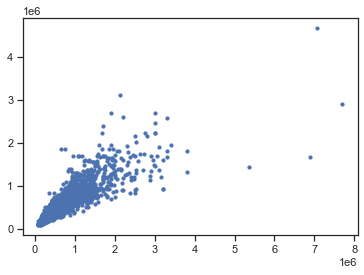

In [64]:
regression_model(X_train, X_test, y_train, y_test, model=LinearRegression())

linear, polynomial, nearest  neighbour, random_forrest

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestRegressor

In [62]:
def regression_model(scaled_x_train, scaled_x_test, y_train, y_test, model=LinearRegression()):
    
    model= LinearRegression()
    Reg_model=model.fit(scaled_x_train, y_train)
    predictions = model.predict(scaled_x_test)

    model = PolynomialFeatures(2)
    x_poly_train = model.fit_transform(scaled_x_train)
    x_poly_test = model.fit_transform(scaled_x_test)
    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    predictions = model.predict(x_poly_test)

    model = KNeighborsClassifier(n_neighbors=2, radius=0.4)
    reg_model = model.fit(scaled_x_train, y_train)
    predictions = model.predict(scaled_x_test)
    
    
    
    #Computing errors
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print('RMSE is -- ' + str(round(rmse,2)))
    print('MAE is -- ' + str(round(mae,2)))
    print('MSE is -- ' + str(round(mse,2)))
    print('R2 is -- ' + str(r2))

    plt.scatter(x=y_test, y= predictions, s=10)
    plt.show()

In [ ]:
# model = RandomForestRegressor(n_estimators=10)
#     model.fit(x_poly_train, y_train)
#     predictions = model.predict(scaled_x_test)

RMSE is -- 247194.15
MAE is -- 132552.69
MSE is -- 61104945478.65
R2 is -- 0.5872669772876903


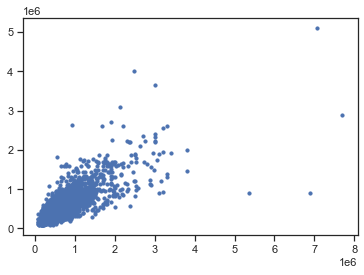

In [209]:
regression_model(X_train, X_test, y_train, y_test, LinearRegression())

In [80]:
temporary_dropped_model = columns_vif(data, 'price', ['sqft_living15'])

C:\Users\jw156\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


id--------3.631154105275809
bedrooms--------1.647480301544481
bathrooms--------3.363161384313586
sqft_living--------inf
sqft_lot--------2.0946425018742536
floors--------1.9115640128187872
waterfront--------1.2030634214617124
view--------1.3921976786982084
condition--------1.2200994274885364
grade--------3.1428294765561375
sqft_above--------inf
sqft_basement--------inf
yr_built--------2.1281917344023054
yr_renovated--------1.1428686283112226
zipcode--------0.48229062232105535
lat--------1.1775280620042805
long--------1.7784375216220707
sqft_lot15--------2.1337848842390548


In [77]:
scale_split_function(temporary_dropped_model, 'price')

(array([[ 1.38504104,  0.66985482,  1.13871678, ...,  0.48982312,
          0.86389874, -0.17809727],
        [ 0.17989123, -0.40062556, -0.47937847, ..., -0.21632151,
          2.70965163, -0.05718199],
        [-0.36829051, -1.47110595, -0.47937847, ..., -1.31001111,
         -0.74758551, -0.32313678],
        ...,
        [-1.23507933, -0.40062556, -0.80299752, ..., -1.69175014,
         -0.8043779 , -0.10653367],
        [ 0.19706731, -0.40062556,  0.16785963, ..., -1.71642529,
         -0.98895319,  0.08138516],
        [-0.43391003,  1.7403352 ,  2.43319298, ..., -0.30123305,
          0.07590424, -0.27165217]]),
 array([[-0.91553093, -1.47110595, -1.45023562, ...,  0.61319886,
         -0.72628836, -0.30842689],
        [ 0.18011078, -0.40062556,  0.49147868, ..., -1.52337855,
          1.5312094 , -0.31033917],
        [-0.08492363, -1.47110595, -1.45023562, ...,  1.15387487,
         -0.96055699, -0.20361893],
        ...,
        [ 1.1373777 , -0.40062556,  0.49147868, ..., -

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

dropped_data = data.drop(['price', 'date'], axis=1)
cols = dropped_data.columns
temporary_cleaned_data = pd.DataFrame.to_numpy(dropped_data)

vif = [variance_inflation_factor(temporary_cleaned_data, i) for i in range(temporary_cleaned_data.shape[1])]

for i in range(len(cols)):
    print(str(cols[i]) + "--------" + str(vif[i]))

id--------3.631154334388575
bedrooms--------1.6474823444122422
bathrooms--------3.3664940208446854
sqft_living--------inf
sqft_lot--------2.101815044520409
floors--------1.9538473541349937
waterfront--------1.2039809847997307
view--------1.4206464395388392
condition--------1.2202464183262423
grade--------3.4048549421594334
sqft_above--------inf
sqft_basement--------inf
yr_built--------2.1311213972387524
yr_renovated--------1.1448119229263023
zipcode--------0.48799172188677403
lat--------1.1801452292778827
long--------1.812130624022116
sqft_living15--------2.8849730272651852
sqft_lot15--------2.140664402064274


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

dropped_data = data.drop(['price', 'sqft_basement', 'yr_built'], axis=1)
cols = dropped_data.columns
temporary_cleaned_data = pd.DataFrame.to_numpy(dropped_data)

vif = [variance_inflation_factor(temporary_cleaned_data, i) for i in range(temporary_cleaned_data.shape[1])]

for i in range(len(cols)):
    print(str(cols[i]) + "--------" + str(vif[i]))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

dropped_data = data.drop(['price', 'sqft_basement', 'lat', 'long'], axis=1)
cols = dropped_data.columns
temporary_cleaned_data = pd.DataFrame.to_numpy(dropped_data)

vif = [variance_inflation_factor(temporary_cleaned_data, i) for i in range(temporary_cleaned_data.shape[1])]

for i in range(len(cols)):
    print(str(cols[i]) + "--------" + str(vif[i]))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [34]:
scale_split_function(temporary_cleaned_data, 'price')

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

dropped_data = data.drop(['price', 'sqft_basement', 'lat', 'long', 'sqft_living', 'sqft_lot' , 'yr_built'], axis=1)
cols = dropped_data.columns
temporary_cleaned_data = pd.DataFrame.to_numpy(dropped_data)

vif = [variance_inflation_factor(temporary_cleaned_data, i) for i in range(temporary_cleaned_data.shape[1])]

for i in range(len(cols)):
    print(str(cols[i]) + "--------" + str(vif[i]))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Correlation is highly correlated & needs to be transformed**

**Step_1**: drop 1 highly correlated feature highly correlated:
 - drop zipcode
 - year_sold

In [61]:
X = data.drop(['zipcode', 'year_sold'], axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

KeyError: "['year_sold'] not found in axis"

**Step_2**: transform highly correlated feature:
 - month_sold to season_sold
 - yr_built to house_age

In [24]:
data['house_age'].unique

<bound method Series.unique of 0        65
1        69
2        87
3        55
4        33
         ..
21592    11
21593     6
21594    11
21595    16
21596    12
Name: house_age, Length: 21597, dtype: int64>

In [25]:
trans_data = pd.get_dummies(data,columns=["season"],drop_first=True)


In [26]:
corr=trans_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold,house_age,season_Spring,season_Summer,season_Winter
bedrooms,1.000000,0.487955,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787,-0.001046,-0.009949,-0.155670,-0.004957,0.012673,0.001464
bathrooms,0.487955,1.000000,0.702719,0.090532,0.368151,0.065424,0.203300,-0.068032,0.591830,0.600458,0.334643,0.378287,0.069153,-0.144937,0.048889,0.150939,0.498534,0.087931,0.519628,0.009497,-0.024406,-0.378287,-0.017599,0.018438,-0.003402
sqft_living,0.578212,0.702719,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917,0.012112,-0.029014,-0.318152,-0.014112,0.025039,-0.008382
sqft_lot,0.032471,0.090532,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876,-0.002591,0.005628,-0.052946,0.007103,-0.013420,0.003885
floors,0.177944,0.368151,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804,0.014245,-0.022352,-0.489193,-0.013648,0.021086,-0.013826
waterfront,-0.006834,0.065424,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398,0.008148,-0.004168,0.026153,-0.004888,-0.002068,-0.002681
view,0.080008,0.203300,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370,-0.005398,0.001268,0.053636,0.001564,-0.004726,-0.000595
condition,0.026496,-0.068032,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056,0.022388,-0.045898,0.361592,-0.029343,0.037943,-0.016501
grade,0.356563,0.591830,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951,0.008989,-0.030635,-0.447865,-0.009053,0.030933,-0.014672
sqft_above,0.479386,0.600458,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.605368,0.010153,-0.023782,-0.424037,-0.016200,0.025239,-0.007827


In [89]:
trans_data = trans_data.drop(['yr_built'], axis=1)
ck = pd.DataFrame.to_numpy(trans_data)

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
colums = trans_data.columns
for i in range(len(colums)):
    print(str(colums[i]) + "--------" + str(vif[i]))

bedrooms--------23.720712496911922
bathrooms--------19.630048015356525
sqft_living--------inf
sqft_lot--------2.3810815753609167
floors--------16.449364650794916
waterfront--------1.2780068814857586
view--------1.6147288752162656
condition--------35.76081629660667
grade--------163.49572106163478
sqft_above--------inf
sqft_basement--------inf
yr_renovated--------1.1957714947362241
zipcode--------5463928.118196141
lat--------159618.5217561194
long--------1397244.0589639028
sqft_living15--------28.183090262382557
sqft_lot15--------2.6045279047578087
price--------10.639015501086533
month_sold--------11.088555675380364
year_sold--------4196002.7521931445
house_age--------9.124789947685056
season_Spring--------4.3558497744783695
season_Summer--------2.7982878113719174
season_Winter--------2.344198975920313


IndexError: index 24 is out of bounds for axis 0 with size 24

In [28]:
trans_data = trans_data.drop(['lat', 'long'], axis=1)
ck = pd.DataFrame.to_numpy(trans_data)

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
colums = trans_data.columns
for i in range(len(colums)):
    print(str(colums[i]) + "--------" + str(vif[i]))

C:\Users\jw156\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


bedrooms--------1.662592668580318
bathrooms--------2.319550801401652
sqft_living--------inf
sqft_lot--------2.0901705649512134
floors--------1.8792621241994552
waterfront--------1.2586946055829418
view--------1.4446804438414147
condition--------1.253677300990059
grade--------3.6966241644513804
sqft_above--------inf
sqft_basement--------inf
yr_built--------81688248.37870273
yr_renovated--------1.14253007421491
zipcode--------1.3076644031687057
sqft_living15--------2.923999998582993
sqft_lot15--------2.1238757506404244
price--------2.9239633266630705
month_sold--------3.870484942784122
year_sold--------4.368109603137341
house_age--------68717.4690222289
season_Spring--------3.122572609856965
season_Summer--------2.3218877844648222
season_Winter--------2.029151862952084


In [29]:
trans_data = trans_data.drop(['yr_built'], axis=1)
ck = pd.DataFrame.to_numpy(trans_data)

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
colums = trans_data.columns
for i in range(len(colums)):
    print(str(colums[i]) + "--------" + str(vif[i]))

bedrooms--------23.70919455638547
bathrooms--------19.610584369283647
sqft_living--------inf
sqft_lot--------2.3673514644170663
floors--------16.266955175987125
waterfront--------1.2682495649036614
view--------1.5790028226553545
condition--------35.54313916556934
grade--------161.15436570031108
sqft_above--------inf
sqft_basement--------inf
yr_renovated--------1.190899740101807
zipcode--------4153953.766210816
sqft_living15--------27.457613430035536
sqft_lot15--------2.5885691346543935
price--------9.23303487191025
month_sold--------11.074748770696106
year_sold--------4149950.83900202
house_age--------8.670153990767549
season_Spring--------4.355849216842694
season_Summer--------2.797969484002621
season_Winter--------2.343882526248106


In [31]:
trans_data.year_sold.unique()

array([2014, 2015], dtype=int64)

# Graphs

In [11]:
graph_data = data.drop(['id'], axis=1)

C:\Users\jw156\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


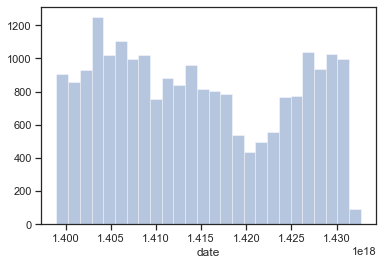

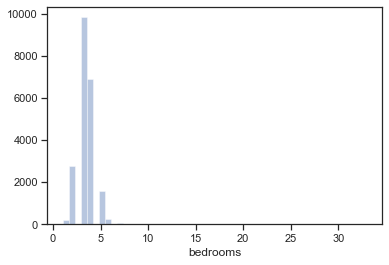

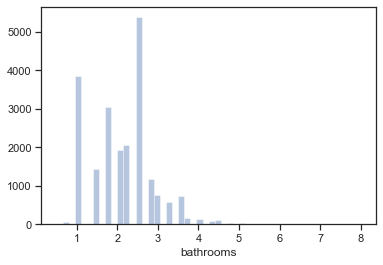

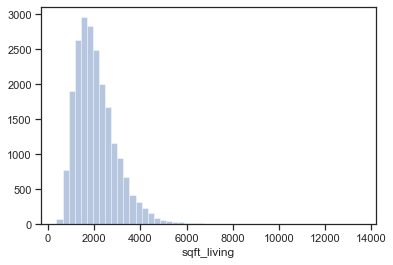

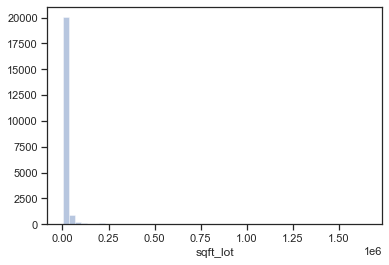

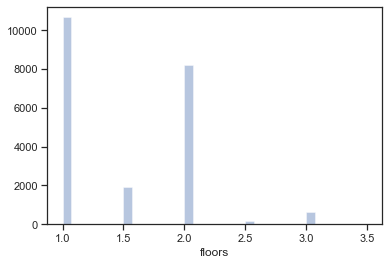

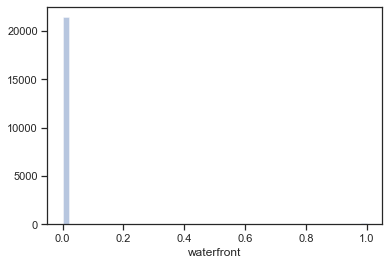

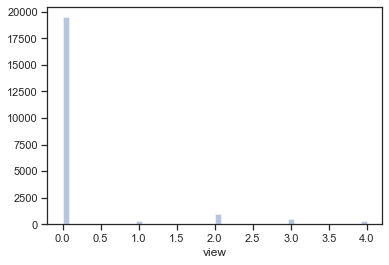

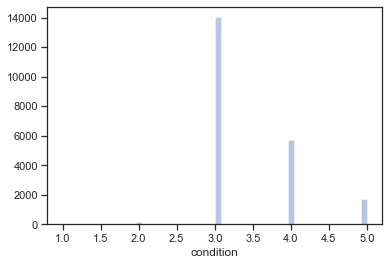

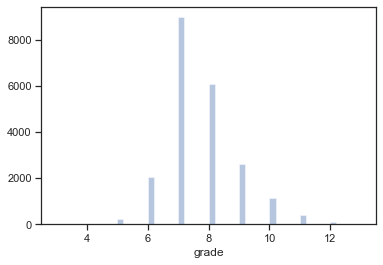

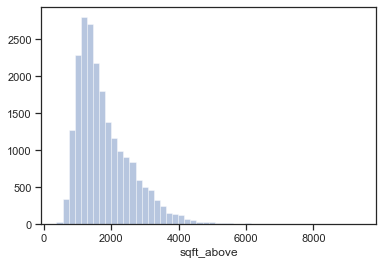

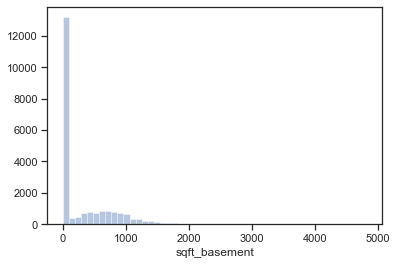

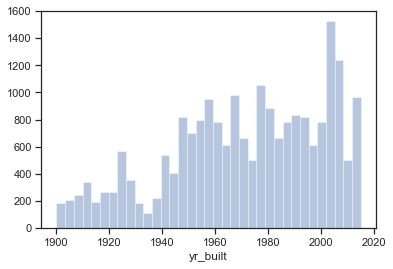

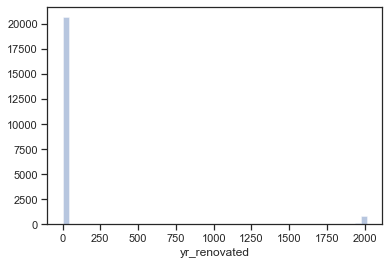

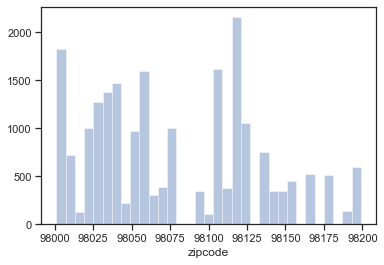

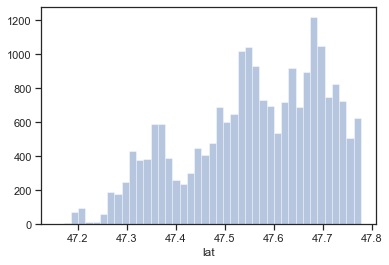

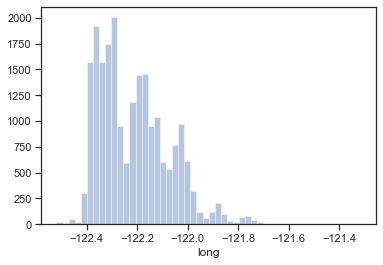

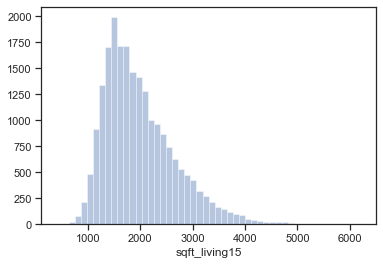

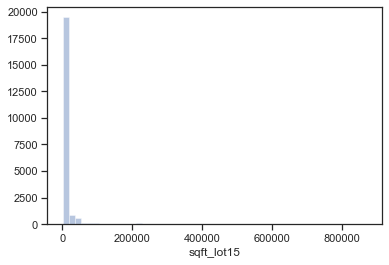

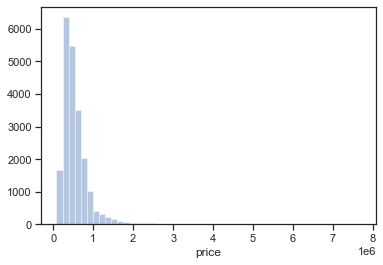

In [12]:
for col in graph_data.columns:
    sns.distplot(graph_data[col], kde=False);
    plt.show()

In [25]:
intz = data.select_dtypes(include=np.int64)
intz = intz.drop(['id'], axis=1)

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point


ModuleNotFoundError: No module named 'geopandas'

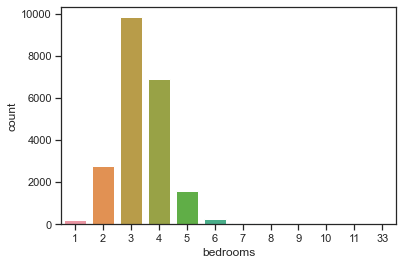

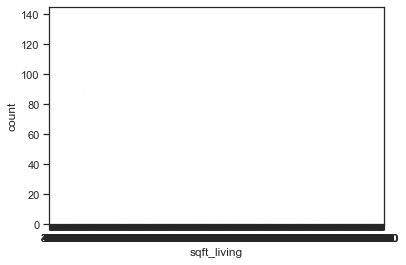

KeyboardInterrupt: 

In [27]:
for col in intz.columns:
    sns.countplot(x=col, data=intz)
    plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [23]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [31]:
BBox = ((data.long.min(),   data.long.max(),      
         data.lat.min(), data.lat.max()))

In [32]:
BBox

(-122.519, -121.315, 47.1559, 47.7776)

In [24]:
data.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import dedent

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (C:\Users\jw156\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py)